# Class Bootstrap

In this notebook we are going to define a class to calculate the bootstrap methods.

In [1]:
import numpy as np
#import pandas as pd
from scipy import stats as st
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
#import seaborn as sns;
#sns.set_style("whitegrid")  

## The Data

In [2]:
np.random.seed(10)
data = np.random.randint(158, 175, 50)

## Using **`Bootstrap.py`**

In [3]:
import goliath_research.bootstrap as boot

In [4]:
# Create a bootstrap object based on the previous sample
# The object will generate multiple samples following the
# bootstrap method (sampling with replacement)

b = boot.Bootstrap(data)

c:\github\GoliathResearch\goliath_research\bootstrap.py:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self._samples[column_name] = sample


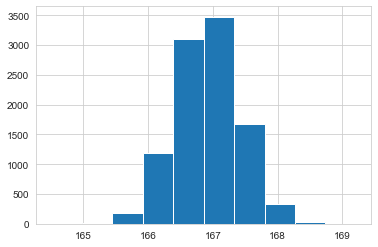

In [5]:
# Once we have the bootstrap object, we can use it for
# creating a sampling distribution of any "statistics"

md = boot.calcSampleDistribution(b.samples, np.mean)

# Sample Distribution Histogram

plt.hist(md);

In [6]:
# 95% confidence interval according to the Sample Distribution

lower, upper = boot.getConfidenceInterval(md, 95)
print(lower, upper)

165.96 167.86


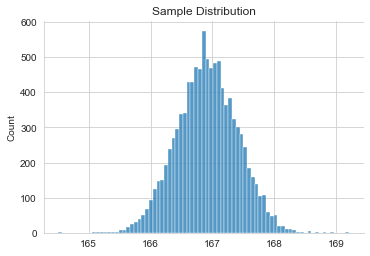

In [7]:
# Graphical View

boot.graphSampleDistribution(md)

(165.96, 167.86)

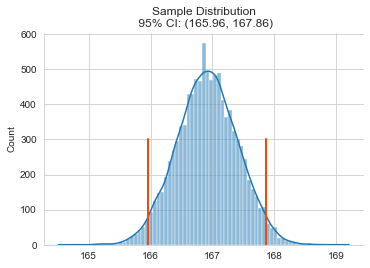

In [8]:
boot.graphConfidenceInterval(md, 95)


## Confidence Intervals

## Confidence interval for the variance 

Let's run the bootstrap hypothesis test for the variance.

We need to calculate the sample distribution using the variance.

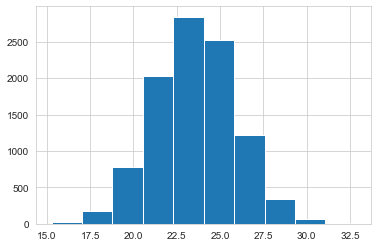

In [10]:
vd = boot.calcSampleDistribution(b.samples, np.var)

plt.hist(vd);

In [11]:
lower, upper = boot.getConfidenceInterval(vd, 95)
print(lower, upper)

19.02624 28.09398


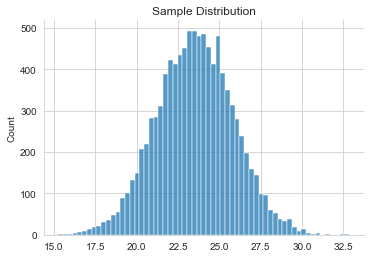

In [12]:
boot.graphSampleDistribution(vd)

(19.02624, 28.09398)

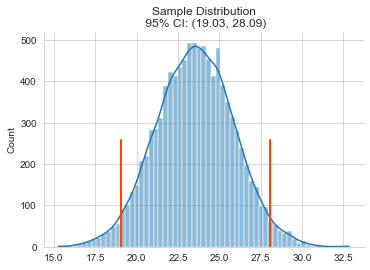

In [13]:
boot.graphConfidenceInterval(vd, 95)

## One-Sample Hypothesis Test

In [14]:
My1HT = boot.OneSampleHT(data, sample_size=40)

c:\github\GoliathResearch\goliath_research\bootstrap.py:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self._samples[column_name] = sample


Let's graph the sampling distribution.

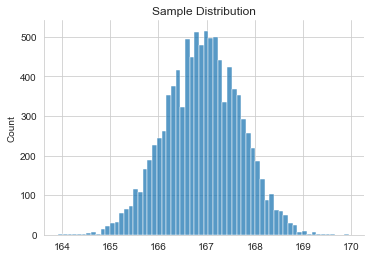

In [16]:
boot.graphSampleDistribution(My1HT.sample_distribution)

Let's test the hypothesis: mean = 165

--- Bootstrapping Method ---
    Ho: measure = 165
    Ha: measure != 165
    Sample mean = 166.92
    p-value = 0.0088


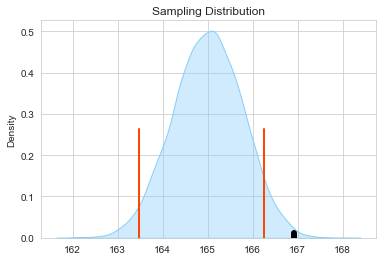

In [17]:
My1HT.graphOneSampleHT(165)

## Verifying

Let's compare this result with the traditional t-test.

In [16]:
def graph_one_sample_ttest(sample, pop_value, alpha=0.05, alternative='two-sided'):
    '''
    sample: list of values
    pop_value: poblational mean
    alpha: significance level
    alternative: one of the three values: 'two-sided', 'smaller', and 'larger'
    '''
    sigHo = {'two-sided':' =', 'smaller':'>=', 'larger':'<='}
    sigHa = {'two-sided':'!=', 'smaller':'< ', 'larger':'> '}
    print('--- One sample t-test ---')
    print('    Ha: mean', sigHo[alternative], np.round(pop_value,2))
    print('    Ha: mean', sigHa[alternative], np.round(pop_value,2))    
    print('Sample Mean = %.2f' %(np.mean(sample)))
    alt={'two-sided':'two-sided','smaller':'less','larger':'greater'}
    t_stat, pval = st.ttest_1samp(sample, pop_value, alternative=alt[alternative])
    print('t-value = %.3f    p-value = %.4f' %(t_stat, pval))
    if pval < alpha:    # alpha value is 0.05 or 5%
        print("%.4f <= %.2f We are rejecting the null hypothesis" %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reasons to reject the null hypothesis" %(pval, alpha))
    df = len(sample) - 1    
    if alternative=='two-sided':
        cv1 = st.t.ppf(alpha/2,df)      #critical value left
        cv2 = st.t.ppf(1-alpha/2,df)    #critical value right
        x1 = np.arange(-4, cv1, 0.01)
        plt.fill_between(x=x1, y1=st.t.pdf(x1,df), facecolor='red', alpha=0.6) 
        x2 = np.arange(cv1, cv2, 0.01)   
        plt.fill_between(x=x2, y1=st.t.pdf(x2,df), facecolor='lightskyblue', alpha=0.5) 
        x3 = np.arange(cv2, 4, 0.01)   
        plt.fill_between(x=x3, y1=st.t.pdf(x3,df), facecolor='red', alpha=0.6)  
        plt.plot(t_stat, 0.005, 'o', color='black')
    elif alternative=='smaller':
        cv1 = st.t.ppf(alpha,df)        #critical value left 
        x1 = np.arange(-4, cv1, 0.01)
        plt.fill_between(x=x1, y1=st.t.pdf(x1,df), facecolor='red', alpha=0.6)
        x2 = np.arange(cv1, 4, 0.01)   
        plt.fill_between(x=x2, y1=st.t.pdf(x2,df), facecolor='lightskyblue', alpha=0.5) 
        plt.plot(t_stat, 0.005, 'o', color='black')
    else:
        cv1 = st.t.ppf(1-alpha,df)        #critical value right 
        x1 = np.arange(-4, cv1, 0.01)
        plt.fill_between(x=x1, y1=st.t.pdf(x1,df), facecolor='lightskyblue', alpha=0.5)
        x2 = np.arange(cv1, 4, 0.01)   
        plt.fill_between(x=x2, y1=st.t.pdf(x2,df), facecolor='red', alpha=0.6) 
        plt.plot(t_stat, 0.005, 'o', color='black')    

In [17]:
graph_one_sample_ttest(data, 165)

--- One sample t-test ---
    Ha: mean  = 165
    Ha: mean != 165
Sample Mean = 166.92


NameError: name 'st' is not defined

As you can see, both test reject the null hypothesis.

## Testing again

Let's test the hypothesis: mean = 167

In [ ]:
My1HT.graphOneSampleHT(167)

In [ ]:
My1HT.graphOneSampleHT(167, alternative='smaller')

We can calculate the bootstrap cpnfidence interval for the mean.

In [ ]:
My1HT.graphConfidenceInterval()

In [ ]:
My1HT.graphConfidenceInterval(99)

In [ ]:
print('90%% Confidence Interval = (%.2f, %.2f)' %(My1HT.confidenceInterval(90)))
print('95%% Confidence Interval = (%.2f, %.2f)' %(My1HT.confidenceInterval(95)))
print('99%% Confidence Interval = (%.2f, %.2f)' %(My1HT.confidenceInterval(99)))